In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
import sklearn.utils as su
import sklearn.ensemble as se
import sklearn.metrics as sm
import matplotlib.pyplot as mp

In [2]:
data = pd.DataFrame(pd.read_excel('数据.xlsx'))
data.drop('Unnamed: 17',axis = 1,inplace = True) #axis参数默认为0
data.drop('Unnamed: 18',axis = 1,inplace = True)
data



,A15,A14,A16,A11,A12,A13,A2,A4,A5,A3,A17,A6,A1,A9,A10,A8,B1
0,4.593233,8.677823,1.659609,1.655181e+09,-4.555321e+08,-1.871641e+09,1.423137,0.211516,0.578760,3.184842e+10,4.278368e+10,1.802221e+10,0.145992,0.084764,0.022348,6.835781e+10,13802507.95
1,2.298318,9.523061,1.061854,8.661206e+08,-6.091957e+08,-7.675948e+08,1.062326,0.032922,0.805651,3.161661e+10,3.760385e+10,7.308258e+09,0.025763,0.035284,0.006281,4.105358e+10,9710441.40
2,5.259369,4.463272,0.939725,2.378817e+08,-1.497276e+08,-1.060152e+08,0.882502,0.122149,0.591833,1.694771e+09,3.816330e+09,1.557702e+09,0.054344,0.070276,0.031262,3.501669e+09,3739451.94
3,4.851287,1.801106,0.449781,4.082181e+08,-6.782769e+08,1.055808e+09,3.844574,1.378131,0.107236,2.469327e+09,7.087798e+09,6.327731e+09,0.877954,0.061877,0.198576,1.971734e+09,20539756.04
4,5.146917,9.094706,2.275403,3.260239e+08,-1.437081e+08,-4.170543e+07,1.390232,0.221321,0.712904,1.074189e+10,1.224533e+10,3.515582e+09,0.068888,0.112679,0.014819,2.673098e+10,3743814.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,4.015516,1.261441,0.683211,1.179389e+08,-8.966096e+07,7.059465e+08,4.347604,2.799681,0.225128,1.790907e+09,2.177739e+09,1.687469e+09,0.327479,0.058237,0.085876,1.144357e+09,4646505.63
400,6.144052,0.807578,0.465095,1.575639e+08,-3.009081e+08,3.302834e+08,3.827672,2.188851,0.183195,6.549910e+08,1.279531e+09,1.045128e+09,1.177376,0.179246,0.419708,4.463468e+08,31939649.57
401,2.842623,0.635438,0.292626,5.063762e+08,-3.065985e+09,4.346754e+09,26.979751,9.596773,0.045004,7.797522e+09,9.792731e+09,9.352016e+09,0.046336,0.095433,0.427429,2.088043e+09,31704338.50
402,14.953036,5.928768,1.186182,9.081232e+08,-5.999712e+08,8.132371e+08,6.401020,4.306622,0.132987,2.032710e+09,2.431509e+09,2.108149e+09,1.100920,0.396441,0.459693,1.818076e+09,7456000.02


In [3]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [4]:
x = data.iloc[:,0:16]
x

,A15,A14,A16,A11,A12,A13,A2,A4,A5,A3,A17,A6,A1,A9,A10,A8
0,4.593233,8.677823,1.659609,1.655181e+09,-4.555321e+08,-1.871641e+09,1.423137,0.211516,0.578760,3.184842e+10,4.278368e+10,1.802221e+10,0.145992,0.084764,0.022348,6.835781e+10
1,2.298318,9.523061,1.061854,8.661206e+08,-6.091957e+08,-7.675948e+08,1.062326,0.032922,0.805651,3.161661e+10,3.760385e+10,7.308258e+09,0.025763,0.035284,0.006281,4.105358e+10
2,5.259369,4.463272,0.939725,2.378817e+08,-1.497276e+08,-1.060152e+08,0.882502,0.122149,0.591833,1.694771e+09,3.816330e+09,1.557702e+09,0.054344,0.070276,0.031262,3.501669e+09
3,4.851287,1.801106,0.449781,4.082181e+08,-6.782769e+08,1.055808e+09,3.844574,1.378131,0.107236,2.469327e+09,7.087798e+09,6.327731e+09,0.877954,0.061877,0.198576,1.971734e+09
4,5.146917,9.094706,2.275403,3.260239e+08,-1.437081e+08,-4.170543e+07,1.390232,0.221321,0.712904,1.074189e+10,1.224533e+10,3.515582e+09,0.068888,0.112679,0.014819,2.673098e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,4.015516,1.261441,0.683211,1.179389e+08,-8.966096e+07,7.059465e+08,4.347604,2.799681,0.225128,1.790907e+09,2.177739e+09,1.687469e+09,0.327479,0.058237,0.085876,1.144357e+09
400,6.144052,0.807578,0.465095,1.575639e+08,-3.009081e+08,3.302834e+08,3.827672,2.188851,0.183195,6.549910e+08,1.279531e+09,1.045128e+09,1.177376,0.179246,0.419708,4.463468e+08
401,2.842623,0.635438,0.292626,5.063762e+08,-3.065985e+09,4.346754e+09,26.979751,9.596773,0.045004,7.797522e+09,9.792731e+09,9.352016e+09,0.046336,0.095433,0.427429,2.088043e+09
402,14.953036,5.928768,1.186182,9.081232e+08,-5.999712e+08,8.132371e+08,6.401020,4.306622,0.132987,2.032710e+09,2.431509e+09,2.108149e+09,1.100920,0.396441,0.459693,1.818076e+09


In [5]:
y = data.iloc[:,-1]
y

0      13802507.95
1       9710441.40
2       3739451.94
3      20539756.04
4       3743814.36
          ...     
399     4646505.63
400    31939649.57
401    31704338.50
402     7456000.02
403     3861746.00
Name: B1, Length: 404, dtype: float64

In [6]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)                      

In [7]:
X_train
X_test
y_train
y_test

360    2.832087e+07
62     3.126581e+06
374    3.646400e+06
92     1.181548e+07
146    3.916800e+06
           ...     
11     1.338617e+08
363    2.360000e+07
300    5.373257e+06
41     8.609583e+06
161    8.161726e+06
Name: B1, Length: 81, dtype: float64

In [8]:
X_train

,A15,A14,A16,A11,A12,A13,A2,A4,A5,A3,A17,A6,A1,A9,A10,A8
185,5.790353,3.748353,0.251709,1.208825e+07,-9.530099e+08,6.628164e+08,6.349162,0.731499,0.131401,1.582520e+09,2.697512e+09,2.343055e+09,0.172784,0.012810,0.048830,6.146835e+08
227,371.522623,0.999841,0.430171,9.803502e+08,-2.184964e+09,2.774371e+09,9.320565,4.097382,0.113216,7.545726e+09,1.157763e+10,1.026686e+10,0.193453,0.104103,0.259916,4.112156e+09
245,15.725909,3.891071,0.884031,4.855731e+08,-4.334044e+07,-5.205794e+08,2.374779,0.415570,0.335032,2.917258e+09,4.060241e+09,2.699932e+09,0.010168,0.138796,0.102280,3.663845e+09
23,3.859928,0.860741,0.315139,1.383297e+08,4.249501e+06,-3.544023e+08,0.568018,0.099974,0.495924,1.151684e+09,4.640791e+09,2.339312e+09,0.363086,0.014529,0.022427,1.515482e+09
321,4.435867,2.730838,0.824958,1.024839e+08,-1.170976e+08,1.463161e+08,1.368892,0.595229,0.471573,1.086827e+09,1.760930e+09,9.305240e+08,0.165349,0.074749,0.051379,1.353793e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,7.352220,2.323341,0.612900,8.899352e+08,1.100011e+09,-1.015025e+09,1.738743,0.805475,0.315081,5.111163e+09,1.079275e+10,7.392155e+09,0.040928,0.286740,0.344607,6.150861e+09
72,4.734380,0.557800,0.271061,8.338920e+08,1.925381e+08,-1.076559e+09,2.236399,0.025288,0.399099,4.463924e+09,7.628959e+09,4.584246e+09,-0.367893,-0.181474,-0.367428,2.264175e+09
396,7.188826,2.426461,0.888022,5.152385e+08,-2.008356e+08,-4.082756e+08,2.416959,1.362178,0.314255,4.065815e+09,5.726791e+09,3.927117e+09,0.144454,0.138453,0.109495,4.965726e+09
235,6.384822,5.249158,0.635983,2.671457e+07,-1.151709e+08,-5.490436e+06,1.354515,0.564114,0.485834,4.166050e+08,1.062971e+09,5.465436e+08,-0.120752,0.029965,0.024450,6.698304e+08


In [9]:
data

,A15,A14,A16,A11,A12,A13,A2,A4,A5,A3,A17,A6,A1,A9,A10,A8,B1
0,4.593233,8.677823,1.659609,1.655181e+09,-4.555321e+08,-1.871641e+09,1.423137,0.211516,0.578760,3.184842e+10,4.278368e+10,1.802221e+10,0.145992,0.084764,0.022348,6.835781e+10,13802507.95
1,2.298318,9.523061,1.061854,8.661206e+08,-6.091957e+08,-7.675948e+08,1.062326,0.032922,0.805651,3.161661e+10,3.760385e+10,7.308258e+09,0.025763,0.035284,0.006281,4.105358e+10,9710441.40
2,5.259369,4.463272,0.939725,2.378817e+08,-1.497276e+08,-1.060152e+08,0.882502,0.122149,0.591833,1.694771e+09,3.816330e+09,1.557702e+09,0.054344,0.070276,0.031262,3.501669e+09,3739451.94
3,4.851287,1.801106,0.449781,4.082181e+08,-6.782769e+08,1.055808e+09,3.844574,1.378131,0.107236,2.469327e+09,7.087798e+09,6.327731e+09,0.877954,0.061877,0.198576,1.971734e+09,20539756.04
4,5.146917,9.094706,2.275403,3.260239e+08,-1.437081e+08,-4.170543e+07,1.390232,0.221321,0.712904,1.074189e+10,1.224533e+10,3.515582e+09,0.068888,0.112679,0.014819,2.673098e+10,3743814.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,4.015516,1.261441,0.683211,1.179389e+08,-8.966096e+07,7.059465e+08,4.347604,2.799681,0.225128,1.790907e+09,2.177739e+09,1.687469e+09,0.327479,0.058237,0.085876,1.144357e+09,4646505.63
400,6.144052,0.807578,0.465095,1.575639e+08,-3.009081e+08,3.302834e+08,3.827672,2.188851,0.183195,6.549910e+08,1.279531e+09,1.045128e+09,1.177376,0.179246,0.419708,4.463468e+08,31939649.57
401,2.842623,0.635438,0.292626,5.063762e+08,-3.065985e+09,4.346754e+09,26.979751,9.596773,0.045004,7.797522e+09,9.792731e+09,9.352016e+09,0.046336,0.095433,0.427429,2.088043e+09,31704338.50
402,14.953036,5.928768,1.186182,9.081232e+08,-5.999712e+08,8.132371e+08,6.401020,4.306622,0.132987,2.032710e+09,2.431509e+09,2.108149e+09,1.100920,0.396441,0.459693,1.818076e+09,7456000.02


In [10]:
data = data.dropna()
data.astype('float')
data


,A15,A14,A16,A11,A12,A13,A2,A4,A5,A3,A17,A6,A1,A9,A10,A8,B1
0,4.593233,8.677823,1.659609,1.655181e+09,-4.555321e+08,-1.871641e+09,1.423137,0.211516,0.578760,3.184842e+10,4.278368e+10,1.802221e+10,0.145992,0.084764,0.022348,6.835781e+10,13802507.95
1,2.298318,9.523061,1.061854,8.661206e+08,-6.091957e+08,-7.675948e+08,1.062326,0.032922,0.805651,3.161661e+10,3.760385e+10,7.308258e+09,0.025763,0.035284,0.006281,4.105358e+10,9710441.40
2,5.259369,4.463272,0.939725,2.378817e+08,-1.497276e+08,-1.060152e+08,0.882502,0.122149,0.591833,1.694771e+09,3.816330e+09,1.557702e+09,0.054344,0.070276,0.031262,3.501669e+09,3739451.94
3,4.851287,1.801106,0.449781,4.082181e+08,-6.782769e+08,1.055808e+09,3.844574,1.378131,0.107236,2.469327e+09,7.087798e+09,6.327731e+09,0.877954,0.061877,0.198576,1.971734e+09,20539756.04
4,5.146917,9.094706,2.275403,3.260239e+08,-1.437081e+08,-4.170543e+07,1.390232,0.221321,0.712904,1.074189e+10,1.224533e+10,3.515582e+09,0.068888,0.112679,0.014819,2.673098e+10,3743814.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,4.015516,1.261441,0.683211,1.179389e+08,-8.966096e+07,7.059465e+08,4.347604,2.799681,0.225128,1.790907e+09,2.177739e+09,1.687469e+09,0.327479,0.058237,0.085876,1.144357e+09,4646505.63
400,6.144052,0.807578,0.465095,1.575639e+08,-3.009081e+08,3.302834e+08,3.827672,2.188851,0.183195,6.549910e+08,1.279531e+09,1.045128e+09,1.177376,0.179246,0.419708,4.463468e+08,31939649.57
401,2.842623,0.635438,0.292626,5.063762e+08,-3.065985e+09,4.346754e+09,26.979751,9.596773,0.045004,7.797522e+09,9.792731e+09,9.352016e+09,0.046336,0.095433,0.427429,2.088043e+09,31704338.50
402,14.953036,5.928768,1.186182,9.081232e+08,-5.999712e+08,8.132371e+08,6.401020,4.306622,0.132987,2.032710e+09,2.431509e+09,2.108149e+09,1.100920,0.396441,0.459693,1.818076e+09,7456000.02


In [32]:
x = data.iloc[:,0:16]
y = data.iloc[:,-1]

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 403
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      400 non-null    float64
 1   A2      400 non-null    float64
 2   A3      400 non-null    float64
 3   A4      400 non-null    float64
 4   A5      400 non-null    float64
 5   A6      400 non-null    float64
 6   A8      400 non-null    float64
 7   A9      400 non-null    float64
 8   A10     400 non-null    float64
 9   A11     400 non-null    float64
 10  A12     400 non-null    float64
 11  A13     400 non-null    float64
 12  A14     400 non-null    float64
 13  A15     400 non-null    float64
 14  A16     400 non-null    float64
 15  A17     400 non-null    float64
 16  B1      400 non-null    float64
dtypes: float64(17)
memory usage: 56.2 KB


In [34]:
total = data.isnull().sum().sort_values(ascending=False)
total

A1     0
A11    0
A17    0
A16    0
A15    0
A14    0
A13    0
A12    0
A10    0
A2     0
A9     0
A8     0
A6     0
A5     0
A4     0
A3     0
B1     0
dtype: int64

In [35]:
df_tmp1 = data[['A1','A2','A3','A4','A5','A6','A8','A9','A10','A11','A12','A13','A14','A15','A16','A17','B1']]
data = df_tmp1
data

,A1,A2,A3,A4,A5,A6,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,B1
0,0.145992,1.423137,3.184842e+10,0.211516,0.578760,1.802221e+10,6.835781e+10,0.084764,0.022348,1.655181e+09,-4.555321e+08,-1.871641e+09,8.677823,4.593233,1.659609,4.278368e+10,13802507.95
1,0.025763,1.062326,3.161661e+10,0.032922,0.805651,7.308258e+09,4.105358e+10,0.035284,0.006281,8.661206e+08,-6.091957e+08,-7.675948e+08,9.523061,2.298318,1.061854,3.760385e+10,9710441.40
2,0.054344,0.882502,1.694771e+09,0.122149,0.591833,1.557702e+09,3.501669e+09,0.070276,0.031262,2.378817e+08,-1.497276e+08,-1.060152e+08,4.463272,5.259369,0.939725,3.816330e+09,3739451.94
3,0.877954,3.844574,2.469327e+09,1.378131,0.107236,6.327731e+09,1.971734e+09,0.061877,0.198576,4.082181e+08,-6.782769e+08,1.055808e+09,1.801106,4.851287,0.449781,7.087798e+09,20539756.04
4,0.068888,1.390232,1.074189e+10,0.221321,0.712904,3.515582e+09,2.673098e+10,0.112679,0.014819,3.260239e+08,-1.437081e+08,-4.170543e+07,9.094706,5.146917,2.275403,1.224533e+10,3743814.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.327479,4.347604,1.790907e+09,2.799681,0.225128,1.687469e+09,1.144357e+09,0.058237,0.085876,1.179389e+08,-8.966096e+07,7.059465e+08,1.261441,4.015516,0.683211,2.177739e+09,4646505.63
400,1.177376,3.827672,6.549910e+08,2.188851,0.183195,1.045128e+09,4.463468e+08,0.179246,0.419708,1.575639e+08,-3.009081e+08,3.302834e+08,0.807578,6.144052,0.465095,1.279531e+09,31939649.57
401,0.046336,26.979751,7.797522e+09,9.596773,0.045004,9.352016e+09,2.088043e+09,0.095433,0.427429,5.063762e+08,-3.065985e+09,4.346754e+09,0.635438,2.842623,0.292626,9.792731e+09,31704338.50
402,1.100920,6.401020,2.032710e+09,4.306622,0.132987,2.108149e+09,1.818076e+09,0.396441,0.459693,9.081232e+08,-5.999712e+08,8.132371e+08,5.928768,14.953036,1.186182,2.431509e+09,7456000.02


In [36]:
x = data.iloc[:,0:16]
y = data.iloc[:,-1]

In [37]:
x = data.drop(columns = ['B1'])
y = data['B1']
import sklearn.model_selection as ms

In [38]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)      

50 -> 0.8998688134292498
100 -> 0.9016960741575808
150 -> 0.9046000823889677
200 -> 0.9076510211505717
250 -> 0.9080181880707033
300 -> 0.9101135899775457
350 -> 0.9060343718224798
400 -> 0.9117227371874379
450 -> 0.9131101314787667
500 -> 0.9066207983055731
550 -> 0.9151586744616075
600 -> 0.9116316298410082
650 -> 0.9109414938388649
700 -> 0.9075030919046665
750 -> 0.9097077541815703
800 -> 0.9065118044520001
850 -> 0.9098935512947628
900 -> 0.9063114341480184
950 -> 0.9103246258817356
1000 -> 0.9063708269595235
1050 -> 0.9071105206438921
1100 -> 0.9056436477006724
1150 -> 0.9101213816052915
1200 -> 0.9060857363713039
1250 -> 0.9086468987125701
1300 -> 0.9094709281484493
1350 -> 0.9121640647638178
1400 -> 0.9064026681740038
1450 -> 0.906096929072506
1500 -> 0.9053509982074945


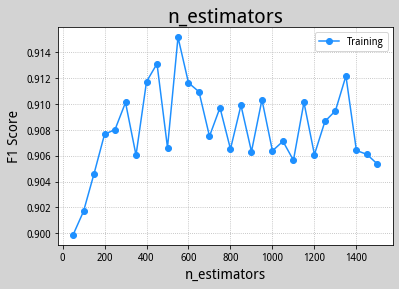

In [43]:
i = []
score = []
for n_estimators in range(50, 1550, 50):
    model = RandomForestRegressor(
                n_estimators = n_estimators,
                max_depth = 10,
                min_samples_split = 2)
    model.fit(x,y)
    y_test_pred = model.predict(x)
    train_means1 = sm.r2_score(y, y_test_pred)
    print(n_estimators, '->', train_means1)
    i.append(n_estimators)
    score.append(train_means1)

mp.figure('n_estimators', facecolor='lightgray')
mp.title('n_estimators', fontsize=20)
mp.xlabel('n_estimators', fontsize=14)
mp.ylabel('F1 Score', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(i, score, 'o-', c='dodgerblue', label='Training')
mp.legend()
mp.show()

5 -> 0.8852996392762249
6 -> 0.8994805659821831
7 -> 0.9006700360257589
8 -> 0.9028644999698875
9 -> 0.9041154778313589
10 -> 0.9066401232140195
11 -> 0.9035664005664483
12 -> 0.9045942602285897
13 -> 0.9099751263863292
14 -> 0.9085256804152114
15 -> 0.9103425391844348
16 -> 0.9103003728893347
17 -> 0.906009075973346
18 -> 0.9085061874086457
19 -> 0.9077009098311153


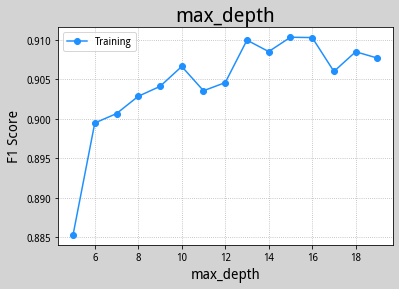

In [18]:
i = []
score = []
for max_depth in range(5, 20, 1):
    model = RandomForestRegressor(
                n_estimators = 650,
                max_depth = max_depth,
                min_samples_split = 2)
    model.fit(x,y)
    y_test_pred = model.predict(x)
    train_means1 = sm.r2_score(y, y_test_pred)
    print(max_depth, '->', train_means1)
    i.append(max_depth)
    score.append(train_means1)

mp.figure('max_depth', facecolor='lightgray')
mp.title('max_depth', fontsize=20)
mp.xlabel('max_depth', fontsize=14)
mp.ylabel('F1 Score', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(i, score, 'o-', c='dodgerblue', label='Training')
mp.legend()
mp.show()

In [44]:
model = RandomForestRegressor(
                n_estimators = 550,
                max_depth = 15,
                min_samples_split = 2)
model.fit(x,y)
y_test_pred = model.predict(x)
print(sm.r2_score(y, y_test_pred))


0.9164301218074087


ValueError: Unknown label type: 'continuous'

In [21]:
train_scores, test_scores = ms.validation_curve(model,X_train, y_train, 'n_estimators', n_estimators, cv=5)
print(train_scores, test_scores)


TypeError: 'int' object is not iterable

In [22]:
train_means1 = train_scores.mean(axis=1)
for param, score in zip(n_estimators, train_means1):
    print(param, '->', score)


NameError: name 'train_scores' is not defined

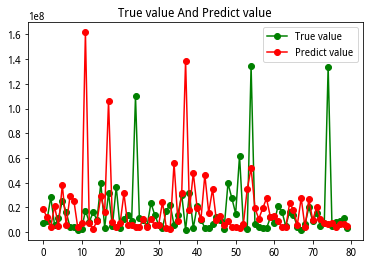

In [45]:
plt.figure()
plt.plot(np.arange(80), y_test[:80], "go-", label="True value")
plt.plot(np.arange(80), y_test_pred[:80], "ro-", label="Predict value")
plt.title("True value And Predict value")
plt.legend()


In [46]:
# Get numerical feature importances
importances = list(model.feature_importances_)
print(importances)

# Saving feature names for later use
feature_list = list(data.columns)[0:16]

feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
print(feature_importances)


[0.03471431286555023, 0.013664622319586489, 0.01787399265155138, 0.019076466044332767, 0.014234554351423104, 0.13408580673895235, 0.012947163600851972, 0.06176660856463677, 0.021866271575525637, 0.4548167566388273, 0.048090384258643676, 0.049371118312153774, 0.0600962062670358, 0.020309838724691512, 0.02289705130264755, 0.014188845783589784]
[('A11', 0.455), ('A6', 0.134), ('A9', 0.062), ('A14', 0.06), ('A13', 0.049), ('A12', 0.048), ('A1', 0.035), ('A16', 0.023), ('A10', 0.022), ('A15', 0.02), ('A4', 0.019), ('A3', 0.018), ('A2', 0.014), ('A5', 0.014), ('A17', 0.014), ('A8', 0.013)]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


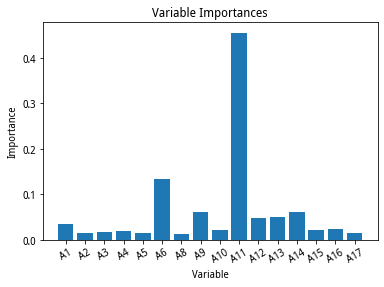

In [47]:

import matplotlib.pyplot as plt
# Set the style
# plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
print(x_values)
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list,rotation=30)
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()


# 随机森林

在自助聚合的基础上，每次构建决策树模型时，不仅随机选择部分样本，而且还随机选择部分特征，这样的集合算法，不仅规避了强势样本对预测结果的影响，而且也削弱了强势特征的影响，使模型的预测能力更加泛化。

随机森林相关API：

```python
import sklearn.ensemble as se
# 随机森林回归模型	（属于集合算法的一种）
# max_depth：决策树最大深度10
# n_estimators：构建1000棵决策树，训练模型
# min_samples_split: 子表中最小样本数 若小于这个数字，则不再继续向下拆分
model = se.RandomForestRegressor(max_depth=10, n_estimators=1000, min_samples_split=2)
```

案例：分析共享单车的需求，从而判断如何进行共享单车的投放。

```python
import numpy as np
import sklearn.utils as su
import sklearn.ensemble as se
import sklearn.metrics as sm
import matplotlib.pyplot as mp

data = np.loadtxt('../data/bike_day.csv', unpack=False, dtype='U20', delimiter=',')
day_headers = data[0, 2:13]
x = np.array(data[1:, 2:13], dtype=float)
y = np.array(data[1:, -1], dtype=float)

x, y = su.shuffle(x, y, random_state=7)
print(x.shape, y.shape)
train_size = int(len(x) * 0.9)
train_x, test_x, train_y, test_y = \
    x[:train_size], x[train_size:], y[:train_size], y[train_size:]
# 随机森林回归器
model = se.RandomForestRegressor( max_depth=10, n_estimators=1000, min_samples_split=2)
model.fit(train_x, train_y)
# 基于“天”数据集的特征重要性
fi_dy = model.feature_importances_
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))

data = np.loadtxt('../data/bike_hour.csv', unpack=False, dtype='U20', delimiter=',')
hour_headers = data[0, 2:13]
x = np.array(data[1:, 2:13], dtype=float)
y = np.array(data[1:, -1], dtype=float)
x, y = su.shuffle(x, y, random_state=7)
train_size = int(len(x) * 0.9)
train_x, test_x, train_y, test_y = \
    x[:train_size], x[train_size:], \
    y[:train_size], y[train_size:]
# 随机森林回归器
model = se.RandomForestRegressor(
    max_depth=10, n_estimators=1000,
    min_samples_split=2)
model.fit(train_x, train_y)
# 基于“小时”数据集的特征重要性
fi_hr = model.feature_importances_
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
```